<a href="https://colab.research.google.com/github/brigittes1/challange-data-science/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [1]:


# Creamos el DataFrame
data = {
    'Producto': ['Asistente virtual', 'Mesa de comedor', 'Juego de mesa', 'Microondas', 'Silla de oficina'],
    'Categoría': ['Electrónicos', 'Muebles', 'Juguetes', 'Electrodomésticos', 'Muebles'],
    'Precio': [164300.0, 192300.0, 209600.0, 757500.0, 335200.0],
    'Costo': [6900.0, 8400.0, 15900.0, 41000.0, 20200.0],
    'Fecha': ['16/01/2021', '18/05/2022', '15/03/2021', '03/05/2022', '07/11/2020'],
    'Cliente': ['Pedro Gomez', 'Beatriz Morales', 'Juan Fernandez', 'Juan Fernandez', 'Maria Alfonso'],
    'Ciudad': ['Bogotá', 'Medellín', 'Cartagena', 'Cali', 'Medellín'],
    'Cantidad': [4, 1, 1, 4, 5],
    'Método de pago': ['Tarjeta de crédito', 'Tarjeta de crédito', 'Tarjeta de crédito', 'Nequi', 'Nequi']
}

df = pd.DataFrame(data)

# Agrupamos por tienda (Ciudad) y sumamos el precio
ingreso_por_tienda = df.groupby('Ciudad')['Precio'].sum().reset_index()

# Mostramos los resultados
print(ingreso_por_tienda)


      Ciudad    Precio
0     Bogotá  164300.0
1       Cali  757500.0
2  Cartagena  209600.0
3   Medellín  527500.0


# 2. Ventas por categoría

In [2]:

data = {
    'Producto': ['Asistente virtual', 'Mesa de comedor', 'Juego de mesa', 'Microondas', 'Silla de oficina'],
    'Categoría': ['Electrónicos', 'Muebles', 'Juguetes', 'Electrodomésticos', 'Muebles'],
    'Precio': [164300.0, 192300.0, 209600.0, 757500.0, 335200.0],
    'Ciudad': ['Bogotá', 'Medellín', 'Cartagena', 'Cali', 'Medellín'],
    'Cantidad': [4, 1, 1, 4, 5]
}

df = pd.DataFrame(data)

# Agrupar por tienda (Ciudad) y categoría, y contar los productos vendidos
ventas_por_categoria = df.groupby(['Ciudad', 'Categoría'])['Cantidad'].sum().reset_index()

# Ordenar de mayor a menor por cantidad
ventas_por_categoria = ventas_por_categoria.sort_values(['Ciudad', 'Cantidad'], ascending=[True, False])

print(ventas_por_categoria)


      Ciudad          Categoría  Cantidad
0     Bogotá       Electrónicos         4
1       Cali  Electrodomésticos         4
2  Cartagena           Juguetes         1
3   Medellín            Muebles         6


# 3. Calificación promedio de la tienda


In [3]:


# Datos de ejemplo con la columna de calificación incluida
data = {
    'Producto': ['Asistente virtual', 'Mesa de comedor', 'Juego de mesa', 'Microondas', 'Silla de oficina'],
    'Categoría': ['Electrónicos', 'Muebles', 'Juguetes', 'Electrodomésticos', 'Muebles'],
    'Precio': [164300.0, 192300.0, 209600.0, 757500.0, 335200.0],
    'Ciudad': ['Bogotá', 'Medellín', 'Cartagena', 'Cali', 'Medellín'],
    'Calificación': [4, 4, 1, 1, 5]  # ← columna de calificaciones de clientes
}

df = pd.DataFrame(data)

# Agrupar por tienda (Ciudad) y calcular la calificación promedio
calificacion_promedio = df.groupby('Ciudad')['Calificación'].mean().reset_index()

# Redondear a dos decimales
calificacion_promedio['Calificación promedio'] = calificacion_promedio['Calificación'].round(2)
calificacion_promedio = calificacion_promedio.drop(columns='Calificación')

print(calificacion_promedio)


      Ciudad  Calificación promedio
0     Bogotá                    4.0
1       Cali                    1.0
2  Cartagena                    1.0
3   Medellín                    4.5


# 4. Productos más y menos vendidos

In [4]:


data = {
    'Producto': ['Asistente virtual', 'Mesa de comedor', 'Juego de mesa', 'Microondas', 'Silla de oficina'],
    'Categoría': ['Electrónicos', 'Muebles', 'Juguetes', 'Electrodomésticos', 'Muebles'],
    'Precio': [164300.0, 192300.0, 209600.0, 757500.0, 335200.0],
    'Ciudad': ['Bogotá', 'Medellín', 'Cartagena', 'Cali', 'Medellín'],
    'Cantidad': [4, 1, 1, 4, 5]
}

df = pd.DataFrame(data)

# Agrupar por tienda y producto, sumando la cantidad vendida
ventas_por_producto = df.groupby(['Ciudad', 'Producto'])['Cantidad'].sum().reset_index()

print(ventas_por_producto)


      Ciudad           Producto  Cantidad
0     Bogotá  Asistente virtual         4
1       Cali         Microondas         4
2  Cartagena      Juego de mesa         1
3   Medellín    Mesa de comedor         1
4   Medellín   Silla de oficina         5


In [5]:
# Más y menos vendidos por tienda
mas_vendidos = ventas_por_producto.loc[ventas_por_producto.groupby('Ciudad')['Cantidad'].idxmax()]
menos_vendidos = ventas_por_producto.loc[ventas_por_producto.groupby('Ciudad')['Cantidad'].idxmin()]

print("Productos más vendidos por tienda:\n", mas_vendidos)
print("\nProductos menos vendidos por tienda:\n", menos_vendidos)


Productos más vendidos por tienda:
       Ciudad           Producto  Cantidad
0     Bogotá  Asistente virtual         4
1       Cali         Microondas         4
2  Cartagena      Juego de mesa         1
4   Medellín   Silla de oficina         5

Productos menos vendidos por tienda:
       Ciudad           Producto  Cantidad
0     Bogotá  Asistente virtual         4
1       Cali         Microondas         4
2  Cartagena      Juego de mesa         1
3   Medellín    Mesa de comedor         1


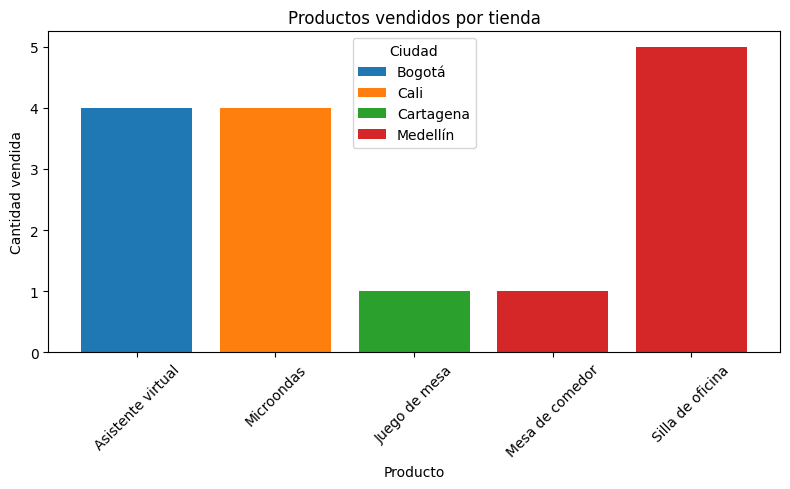

In [7]:

# Gráfico de los productos más vendidos
plt.figure(figsize=(8, 5))
for ciudad in ventas_por_producto['Ciudad'].unique():
    subset = ventas_por_producto[ventas_por_producto['Ciudad'] == ciudad]
    plt.bar(subset['Producto'], subset['Cantidad'], label=ciudad)

plt.title('Productos vendidos por tienda')
plt.xlabel('Producto')
plt.ylabel('Cantidad vendida')
plt.legend(title='Ciudad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [8]:

data = {
    'Producto': ['Asistente virtual', 'Mesa de comedor', 'Juego de mesa', 'Microondas', 'Silla de oficina'],
    'Categoría': ['Electrónicos', 'Muebles', 'Juguetes', 'Electrodomésticos', 'Muebles'],
    'Precio': [164300.0, 192300.0, 209600.0, 757500.0, 335200.0],
    'Costo de envío': [6900.0, 8400.0, 15900.0, 41000.0, 20200.0],
    'Ciudad': ['Bogotá', 'Medellín', 'Cartagena', 'Cali', 'Medellín']
}

df = pd.DataFrame(data)

# Agrupar por tienda (Ciudad) y calcular el costo de envío promedio
envio_promedio = df.groupby('Ciudad')['Costo de envío'].mean().reset_index()

# Redondear a dos decimales
envio_promedio['Costo de envío promedio'] = envio_promedio['Costo de envío'].round(2)
envio_promedio = envio_promedio.drop(columns='Costo de envío')

print(envio_promedio)


      Ciudad  Costo de envío promedio
0     Bogotá                   6900.0
1       Cali                  41000.0
2  Cartagena                  15900.0
3   Medellín                  14300.0


# 6. graficos

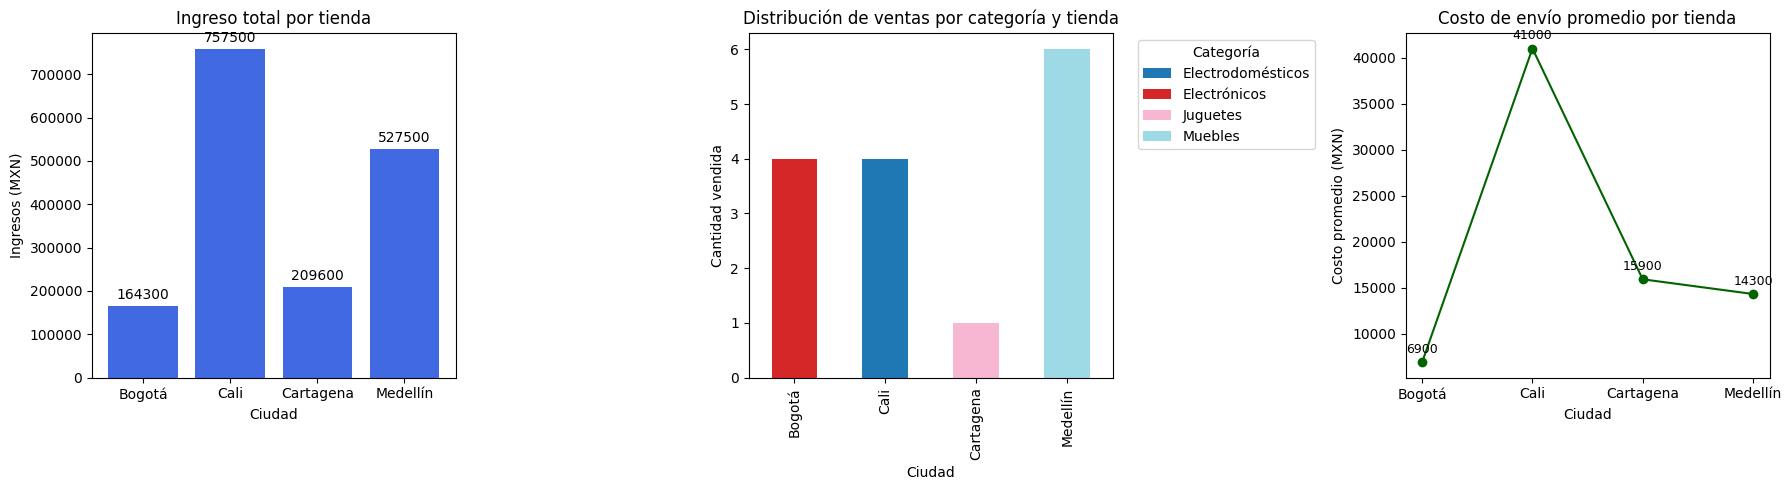

In [9]:

# Datos base
data = {
    'Producto': ['Asistente virtual', 'Mesa de comedor', 'Juego de mesa', 'Microondas', 'Silla de oficina'],
    'Categoría': ['Electrónicos', 'Muebles', 'Juguetes', 'Electrodomésticos', 'Muebles'],
    'Precio': [164300.0, 192300.0, 209600.0, 757500.0, 335200.0],
    'Costo de envío': [6900.0, 8400.0, 15900.0, 41000.0, 20200.0],
    'Ciudad': ['Bogotá', 'Medellín', 'Cartagena', 'Cali', 'Medellín'],
    'Cantidad': [4, 1, 1, 4, 5],
    'Calificación': [4, 4, 1, 1, 5]
}

df = pd.DataFrame(data)

# 1️⃣ Ingreso total por tienda
ingresos = df.groupby('Ciudad')['Precio'].sum()

# 2️⃣ Distribución de ventas por categoría y tienda
ventas_categoria = df.groupby(['Ciudad', 'Categoría'])['Cantidad'].sum().unstack(fill_value=0)

# 3️⃣ Costo de envío promedio por tienda
envio_promedio = df.groupby('Ciudad')['Costo de envío'].mean()

# 4️⃣ Calificación promedio por tienda
calificacion_promedio = df.groupby('Ciudad')['Calificación'].mean()

# -------------------------------------------------------------------
# 🎨 CONFIGURACIÓN GENERAL DE GRÁFICOS
plt.style.use('seaborn-v0_8-muted')
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# -------------------------------------------------------------------
# 📊 GRÁFICO 1 – Ingreso total por tienda
axes[0].bar(ingresos.index, ingresos.values, color='royalblue')
axes[0].set_title('Ingreso total por tienda')
axes[0].set_xlabel('Ciudad')
axes[0].set_ylabel('Ingresos (MXN)')
axes[0].bar_label(axes[0].containers[0], fmt='%.0f', padding=3)

# -------------------------------------------------------------------
# 📦 GRÁFICO 2 – Distribución de ventas por categoría
ventas_categoria.plot(kind='bar', stacked=True, ax=axes[1], colormap='tab20')
axes[1].set_title('Distribución de ventas por categoría y tienda')
axes[1].set_xlabel('Ciudad')
axes[1].set_ylabel('Cantidad vendida')
axes[1].legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')

# -------------------------------------------------------------------
# 💸 GRÁFICO 3 – Costo de envío promedio
axes[2].plot(envio_promedio.index, envio_promedio.values, marker='o', linestyle='-', color='darkgreen')
axes[2].set_title('Costo de envío promedio por tienda')
axes[2].set_xlabel('Ciudad')
axes[2].set_ylabel('Costo promedio (MXN)')
for i, val in enumerate(envio_promedio.values):
    axes[2].text(i, val + 1000, f'{val:.0f}', ha='center', fontsize=9)

# -------------------------------------------------------------------
plt.tight_layout()
plt.show()
